# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [3]:
cities

['broken hill',
 'attawapiskat',
 'sao filipe',
 'portland',
 'kaitangata',
 'avarua',
 'rikitea',
 'laja',
 'oksfjord',
 'ushuaia',
 'talcahuano',
 'mataura',
 'carnarvon',
 'northam',
 'butaritari',
 'puerto ayora',
 'pietersburg',
 'cherskiy',
 'aksarka',
 'flinders',
 'grand centre',
 'vaini',
 'jamestown',
 'mercedes',
 'nikolskoye',
 'katherine',
 'aklavik',
 'hermanus',
 'sembe',
 'new norfolk',
 'haines junction',
 'punta arenas',
 'samusu',
 'illoqqortoormiut',
 'georgetown',
 'bambous virieux',
 'srivardhan',
 'tsumeb',
 'dom pedro',
 'atuona',
 'kawalu',
 'upernavik',
 'barrow',
 'chuy',
 'drayton valley',
 'saint-philippe',
 'saint anthony',
 'bredasdorp',
 'hilo',
 'castro',
 'ewa beach',
 'tasiilaq',
 'cape town',
 'mahebourg',
 'honningsvag',
 'pisco',
 'suao',
 'hanzhong',
 'lom sak',
 'hobart',
 'toliary',
 'bluff',
 'angoche',
 'husavik',
 'nemuro',
 'buchanan',
 'port alfred',
 'ketchikan',
 'tiznit',
 'harper',
 'cootehill',
 'fare',
 'ahipara',
 'kapaa',
 'golden',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# print(final_url)
# response = requests.get(final_url).json()
# latitude = response["coord"]["lat"]
# longitude = response["coord"]["lon"]
# temperature = response["main"]["temp"]
# temp_max = response["main"]["temp_max"]
# wind_speed = response["wind"]["speed"]
# country = response["sys"]["country"]

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q=" 
weather = []
city_list = []
latitude_list = []
longitude_list = []
temp_list = []
temp_max_list = []
wind_speed_list = []
country_list = []
humidity_list = []
cloudiness_list = []
for city in cities:
#     str(city).replace(' ','')
    try:
        final_url = query_url+ city
        response = requests.get(final_url).json()
        latitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        temperature = response["main"]["temp"]
        temp_max = response["main"]["temp_max"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        humidity = response['main']['humidity']
        cloudiness = response['clouds']['all']
#         print(response)
        city_list.append(city)
        latitude_list.append(latitude)
        longitude_list.append(longitude)
        temp_list.append(temperature)
        temp_max_list.append(temp_max)
        wind_speed_list.append(wind_speed)
        country_list.append(country)
        humidity_list.append(humidity)
        cloudiness_list.append(cloudiness)
    except:
#         print('Missing Information')
        pass

In [6]:
#print(len(city_list))
#print(len(latitude_list))
len(country_list)

582

In [32]:
df = pd.DataFrame()
df['City'] = city_list
df['Latitude'] = latitude_list
df['Longitude'] = longitude_list
df['Temperature'] = temp_list 
df['Maximum Temperature']= temp_max_list
df['Wind Speed'] = wind_speed_list 
df['Country'] = country_list
df['Humidity'] = humidity_list
df['Cloudiness'] = cloudiness_list

In [33]:
df

,City,Latitude,Longitude,Temperature,Maximum Temperature,Wind Speed,Country,Humidity,Cloudiness
0,broken hill,-31.9500,141.4333,308.15,308.15,3.60,AU,16,0
1,sao filipe,14.8961,-24.4956,294.39,294.39,3.34,CV,75,44
2,portland,45.5234,-122.6762,274.01,275.37,1.54,US,69,1
3,kaitangata,-46.2817,169.8464,288.71,288.71,1.79,NZ,66,100
4,avarua,-21.2078,-159.7750,301.15,301.15,2.06,CK,78,20
...,...,...,...,...,...,...,...,...,...
577,kholmogory,64.2229,41.6560,245.15,245.15,1.00,RU,76,20
578,veraval,20.9000,70.3667,300.15,300.15,1.52,IN,27,83
579,umtata,-31.5889,28.7844,293.15,293.15,1.54,ZA,94,75
580,magdagachi,53.4500,125.8000,260.84,260.84,1.12,RU,93,74


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [97]:
df.to_csv(r'/Users/monicabustillos/Documents/python-api-challenge/WeatherPy/cityinfo.csv')
df = pd.read_csv('cityinfo.csv')
df

,Unnamed: 0,Unnamed: 0.1,City,Latitude,Longitude,Wind Speed,Country,Humidity,Cloudiness,Temperature - F,Max Temperature - F
0,0,0,broken hill,-31.9500,141.4333,3.60,AU,16,0,95.000,95.000
1,1,1,sao filipe,14.8961,-24.4956,3.34,CV,75,44,70.232,70.232
2,2,2,portland,45.5234,-122.6762,1.54,US,69,1,33.548,35.996
3,3,3,kaitangata,-46.2817,169.8464,1.79,NZ,66,100,60.008,60.008
4,4,4,avarua,-21.2078,-159.7750,2.06,CK,78,20,82.400,82.400
...,...,...,...,...,...,...,...,...,...,...,...
577,577,577,kholmogory,64.2229,41.6560,1.00,RU,76,20,-18.400,-18.400
578,578,578,veraval,20.9000,70.3667,1.52,IN,27,83,80.600,80.600
579,579,579,umtata,-31.5889,28.7844,1.54,ZA,94,75,68.000,68.000
580,580,580,magdagachi,53.4500,125.8000,1.12,RU,93,74,9.842,9.842


In [100]:
# df['Temperature - F'] = ((df['Temperature']) - 273.15) * 9/5 + 32 
df
# df['Max Temperature - F'] = ((df['Maximum Temperature']) - 273.15) * 9/5 + 32 
# df =df.drop(column=[4,5])
df

,Unnamed: 0,Unnamed: 0.1,City,Latitude,Longitude,Wind Speed,Country,Humidity,Cloudiness,Temperature - F,Max Temperature - F
0,0,0,broken hill,-31.9500,141.4333,3.60,AU,16,0,95.000,95.000
1,1,1,sao filipe,14.8961,-24.4956,3.34,CV,75,44,70.232,70.232
2,2,2,portland,45.5234,-122.6762,1.54,US,69,1,33.548,35.996
3,3,3,kaitangata,-46.2817,169.8464,1.79,NZ,66,100,60.008,60.008
4,4,4,avarua,-21.2078,-159.7750,2.06,CK,78,20,82.400,82.400
...,...,...,...,...,...,...,...,...,...,...,...
577,577,577,kholmogory,64.2229,41.6560,1.00,RU,76,20,-18.400,-18.400
578,578,578,veraval,20.9000,70.3667,1.52,IN,27,83,80.600,80.600
579,579,579,umtata,-31.5889,28.7844,1.54,ZA,94,75,68.000,68.000
580,580,580,magdagachi,53.4500,125.8000,1.12,RU,93,74,9.842,9.842


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
df['Humidity'].describe()

count    582.000000
mean      75.003436
std       20.311600
min       15.000000
25%       66.250000
50%       81.000000
75%       90.000000
max      100.000000
Name: Humidity, dtype: float64

In [37]:
#  Get the indices of cities that have humidity over 100%.


In [38]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [54]:
lat_data = df['Latitude']
max_temp_data = df['Max Temperature - F'] 
max_temp_data.describe()

count    582.000000
mean      50.199021
std       31.739666
min      -41.800000
25%       27.288500
50%       60.647000
75%       75.200000
max       98.618000
Name: Max Temperature - F, dtype: float64

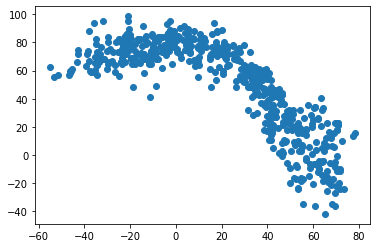

In [58]:
plt.scatter(x=lat_data,y=max_temp_data)

In [ ]:
# This shows us that the warmest temperatures are near the equator. 

## Latitude vs. Humidity Plot

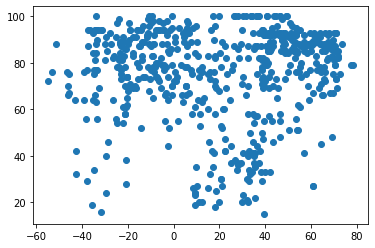

In [44]:
hum_data = df['Humidity']
plt.scatter(x=lat_data,y=hum_data)

In [ ]:
# It is tough to tell here if there is any kind of trend. The data is very scattered. 

## Latitude vs. Cloudiness Plot

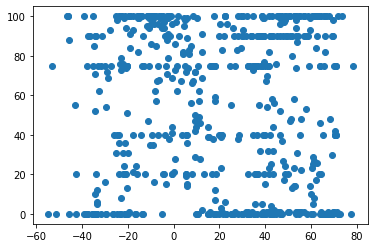

In [45]:
cloud_data = df['Cloudiness']
plt.scatter(x=lat_data,y=cloud_data)

In [ ]:
#  Same as above. This data is scattered and theres not an observable trend.

## Latitude vs. Wind Speed Plot

In [ ]:
wind_speed_data = df['Wind Speed']
plt.scatter(x=lat_data,y=wind_speed_data)

## Linear Regression

In [47]:
df.head()

,City,Latitude,Longitude,Temperature,Maximum Temperature,Wind Speed,Country,Humidity,Cloudiness,Temperature - F,Max Temperature - F
0,broken hill,-31.9500,141.4333,308.15,308.15,3.60,AU,16,0,95.000,95.000
1,sao filipe,14.8961,-24.4956,294.39,294.39,3.34,CV,75,44,70.232,70.232
2,portland,45.5234,-122.6762,274.01,275.37,1.54,US,69,1,33.548,35.996
3,kaitangata,-46.2817,169.8464,288.71,288.71,1.79,NZ,66,100,60.008,60.008
4,avarua,-21.2078,-159.7750,301.15,301.15,2.06,CK,78,20,82.400,82.400


In [77]:
# northern hemisphere
north = df.loc[df['Latitude']>0]
north_hemi = north['Latitude']
# southern hemisphere
south = df.loc[df['Latitude']<0]
south_hemi = south['Latitude']
north_hemi.describe()

count    392.000000
mean      38.904296
std       19.967178
min        0.133300
25%       22.433850
50%       39.727750
75%       54.133400
max       78.218600
Name: Latitude, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

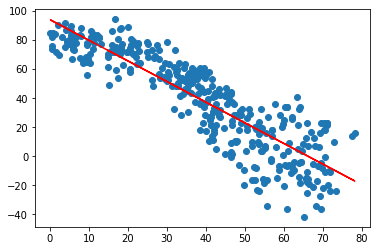

In [78]:
max_temp_data = north['Max Temperature - F']
plt.scatter(x=north_hemi,y=max_temp_data)

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi, max_temp_data)
regress_values = north_hemi * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_hemi,regress_values,"r-")

In [ ]:
#  The temperatures clearly decrease as you move away from the equator. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

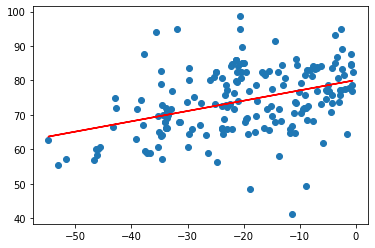

In [81]:
max_temp_data = south['Max Temperature - F']
plt.scatter(x=south_hemi,y=max_temp_data)

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi, max_temp_data)
regress_values = south_hemi * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_hemi,regress_values,"r-")

In [ ]:
# The temperatures increase as we move closer to the equator. However, this slope is not as steep. This means that the northern hemisphere sees a wider range of temperatures. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

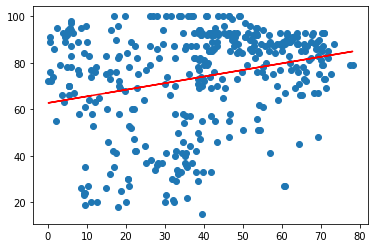

In [83]:
humidity_data = north['Humidity']
plt.scatter(x=north_hemi,y=humidity_data)

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi, humidity_data)
regress_values = north_hemi * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_hemi,regress_values,"r-")

In [ ]:
# It is hard to tell what trends there are with humidity and the norther hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

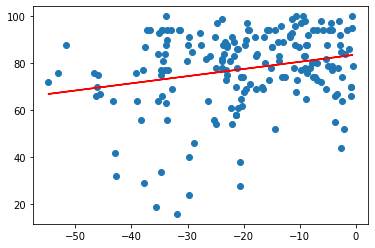

In [84]:
humidity_data = south['Humidity']
plt.scatter(x=south_hemi,y=humidity_data)

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi, humidity_data)
regress_values = south_hemi * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_hemi,regress_values,"r-")

In [ ]:
# Same as above. The trends here are unclear. However, you can tell that a lot of the northern hemisphere experiences humidity over 60. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

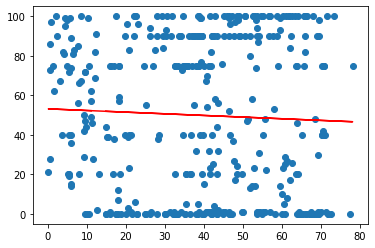

In [85]:
cloudiness_data = north['Cloudiness']
plt.scatter(x=north_hemi,y=cloudiness_data)

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi, cloudiness_data)
regress_values = north_hemi * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_hemi,regress_values,"r-")

In [ ]:
#  No observable trends here. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

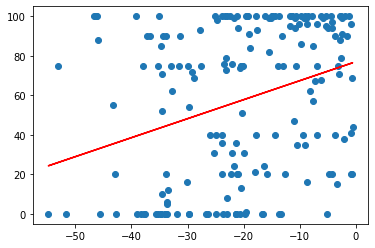

In [86]:
cloudiness_data = south['Cloudiness']
plt.scatter(x=south_hemi,y=cloudiness_data)

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi, cloudiness_data)
regress_values = south_hemi * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_hemi,regress_values,"r-")

In [ ]:
# This data is very scattered. Location may not affect cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

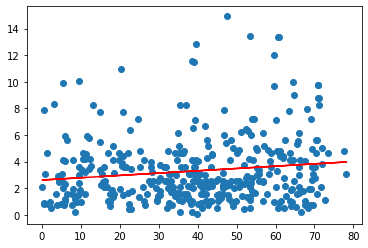

In [87]:
wind_speed_data = north['Wind Speed']
plt.scatter(x=north_hemi,y=wind_speed_data)

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi, wind_speed_data)
regress_values = north_hemi * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_hemi,regress_values,"r-")

In [ ]:
# Wind speed is not typically high in the norhtern hemisphere from this illustration. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

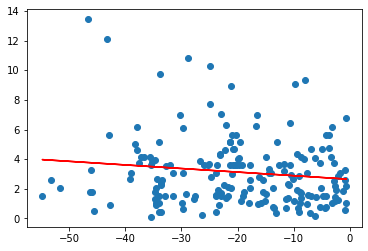

In [88]:
wind_speed_data = south['Wind Speed']
plt.scatter(x=south_hemi,y=wind_speed_data)

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi, wind_speed_data)
regress_values = south_hemi * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_hemi,regress_values,"r-")

In [ ]:
# It appears that the souther hemisphere also does not experience strong wind speeds. 